In [22]:
# Analysis of ReimagineReview data for the Preprint Review taxonomy 
# Victoria Yan November 2021
# Note that some Author/Non-author split comparison counts are hard coded
#import libraries
import csv
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
from pylab import *
from matplotlib.colors import *

In [23]:
TPath = os.path.abspath('/Users/victoriayan/Documents/Python/ASAPbio_analysis/Listings-Export-2021-November-03-0850.csv')
W_tab = pd.read_csv(TPath,sep=",")

In [24]:
 maskPreprints = W_tab['Types of outputs'].str.contains('Preprints') 
# Where in CSV table there is a blank, it becomes NaN, and cannot be used with the mask

In [25]:
# Filter for preprint projects that are active
P_tab = W_tab[maskPreprints]
maskActive = P_tab['Project status'].str.contains('Active') 



In [26]:
# drop Peeriodicals because it is a curation project
AP_tab = AP_tab[~AP_tab['Title'].str.contains("Peeriodicals")]
AP_tab

,Title,Content,Project status,Types of outputs,Transparency,Format,Process,Disciplinary fields,Review requested by,Reviewer selected by,Review coverage,Reviewer identity known,Competing interests,Public interaction,Opportunity for author response,Recommendation,_verified
0,PREreview,At PREreview we strive to provide systematical...,Active,Preprints,Open identities|Open interaction|Open reports|...,Free-form commenting|Structured review form,Comment indexing|Comment moderation|Comment ra...,All disciplines|Life Sciences,Authors|Non-authors,Self-nominated,Complete paper,Editor or service,Not included,Included,Not included,Other scale or rating,Unverified
1,preLights,The project aims to help scientists navigate t...,Active,Preprints,Open identities,Free-form commenting,Pre-publication review,Life Sciences,Non-authors,Self-nominated,Complete paper,Public,Not included,Included,Included,None,Unverified
3,Hypothesis,Hypothesis is a new effort to implement an old...,Active,Journal accepted manuscripts|Other scholarly o...,Double blind|Open identities|Open interaction|...,Annotations|Free-form commenting|Structured re...,Comment indexing|Comment moderation|Journal in...,All disciplines,Non-authors,Self-nominated,Specific aspects,Editor or service,Not included,Included,Not included,None,Unverified
4,Plaudit,Plaudit allows researchers to publicly endorse...,Active,Journal accepted manuscripts|Other scholarly o...,Open identities|Open interaction|Open particip...,Annotations|Quantitative scores|Structured rev...,Journal integration|Post-publication review,All disciplines,Non-authors,Self-nominated,Complete paper,Public,Not included,Included,Not included,Binary decision,Verified
5,Peer Community In,The “Peer Community in” (PCI) is a non-profit ...,Active,Preprints,Double blind|Open identities|Open reports|Sing...,Free-form commenting,NaN,All disciplines,Authors,"Editor, service, or community",Complete paper,Editor or service,Checked,Not included,Included,Binary decision,Verified
6,SciRate,SciRate is a collaborative open science platfo...,Active,Preprints,Open identities|Open interaction|Open particip...,Free-form commenting|Quantitative scores,Pre-publication review,All disciplines,Non-authors,Self-nominated,Complete paper,Public,Checked,Included,Not included,Other scale or rating,Verified
14,Interactive Public Peer Review,Copernicus Publications has been offering the ...,Active,Journal accepted manuscripts|Preprints,Open interaction|Open participation|Open reports,Free-form commenting|Structured review form,Comment indexing|Journal integration|Pre-publi...,All disciplines,Authors,"Editor, service, or community",Complete paper|Specific aspects,Editor or service,Checked,Included,Included,Binary decision,Unverified
15,Episciences,Episciences.org is an innovative combination o...,Active,Preprints,Open interaction|Single blind,Free-form commenting|Quantitative scores|Struc...,Journal integration|Post-publication review|Pr...,All disciplines,Authors,"Editor, service, or community",Complete paper,Editor or service,Checked,Not included,Included,Binary decision,Verified
16,Faculty Opinions,"Launched in 2002, Faculty Opinions(formerly F1...",Active,Journal accepted manuscripts|Other scholarly o...,Open identities|Open reports,Annotations|Free-form commenting|Quantitative ...,Comment indexing|Post-publication review,Life Sciences,Authors,"Editor, service, or community",Complete paper,Public,Checked,Not included,Included,Other scale or rating,Unverified
27,Peerage of Science,"How it works: Free for scientists, journals pa...",Active,Other scholarly outputs|Preprints|Privately sh...,Double blind|Open interaction|Open participati...,Free-form commenting|Quantitative scores|Struc...,Comment rating (meta-evaluation)|Journal integ...,All disciplines|Life Sciences,Authors,"Editor, service, or community|Self-nominated",Complete paper,Editor or service,Checked,Included,Included,Binary decision,Verified


In [64]:
# 28 projects in total
# Review requested by
rrANA = 2 #Queios and PREreview
rrA = AP_tab['Review requested by'].str.contains('Authors').sum()-[rrANA]
rrNA = AP_tab['Review requested by'].str.contains('Non-authors').sum()-[rrANA]

# Reviewer selected by
rsES = 2 #Peerage of science,SciPost
rsAE = 1 # Science Open reviewed
rsA = 0
rsS = 12 #AP_tab['Reviewer selected by'].str.contains('Self').sum() - [rsAS]
rsESC = 13#AP_tab['Reviewer selected by'].str.contains('Editor').sum() - [rsAE]

# Public interaction
piI = AP_tab['Public interaction'].str.contains('Included').sum()
piN = AP_tab['Public interaction'].str.contains('Not').sum()

# Author response
arI = AP_tab['Opportunity for author response'].str.contains('Included').sum()
arN = AP_tab['Opportunity for author response'].str.contains('Not').sum()

# Recommendation
reBO = 1 # Science Open
reB = AP_tab['Recommendation'].str.contains('Binary').sum() -[reBO]
reO = AP_tab['Recommendation'].str.contains('Other').sum() -[reBO]
reN = AP_tab['Recommendation'].str.contains('None').sum()

# Review coverage
rcCS = 4
rcC = AP_tab['Review coverage'].str.contains('Complete').sum() -[rcCS]
rcS = AP_tab['Review coverage'].str.contains('Specific').sum() -[rcCS]

# Reviewer identity known to
riEP = 1
riNP = 1
riE = AP_tab['Reviewer identity known'].str.contains('Editor').sum() -[riEP]
riP = AP_tab['Reviewer identity known'].str.contains('Public').sum() - [riNP]-[riEP]
riN = AP_tab['Reviewer identity known'].str.contains('Noone').sum() - [riNP]

# Competing interests
ciD = AP_tab['Competing interests'].str.contains('Displayed').sum()
ciC = AP_tab['Competing interests'].str.contains('Checked').sum()
ciN = AP_tab['Competing interests'].str.contains('Not').sum()

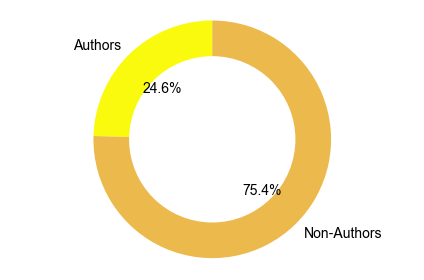

In [82]:
labels = ['Authors', 'Non-Authors']
sizes = [14, 43]
#colors
colors = ['#F9FA0D', '#ECB94C']
#colors = ['#ffcc99','#66b3ff','#99ff99'] #,'#ff9999'
 
fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90,
        textprops={'fontsize':14, 'family': 'sans-serif', 'name': 'Arial'})

#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()


In [65]:
# Data frame of results
count = np.array([[rrA,rrNA,rrANA,0,0],[rsESC,rsS,rsA,rsES,rsAE],[piI,piN,0,0,0],[arI,arN,0,0,0],\
             [reB,reO,reN,reBO,0],[rcC,rcS,rcCS,0,0],[riE,riP,riN,riEP,riNP],[ciD,ciC,ciN,0,0]])
countInt = count.astype(int)

df = pd.DataFrame(data=countInt, index = ['1','2','3','4','5','6','7','8'], \
                  columns=["col1", "col2","col3","col4","col5"])
taxonomy = ["Review requested by","Reviewer selected by",\
                    "Public interaction","Author response", "Recommendation",\
                    "Review coverage","Reviewer identity known to","Competing interest"]

df.insert(0,"Taxonomy", taxonomy)
# Flip the table for plotting later
reversed_df = df.iloc[::-1]
print(reversed_df)

                     Taxonomy  col1  col2  col3  col4  col5
8          Competing interest     1    13    14     0     0
7  Reviewer identity known to    15    11     0     1     1
6             Review coverage    22     2     4     0     0
5              Recommendation     9     8    10     1     0
4             Author response    19     9     0     0     0
3          Public interaction    17    11     0     0     0
2        Reviewer selected by    13    12     0     2     1
1         Review requested by    13    13     2     0     0


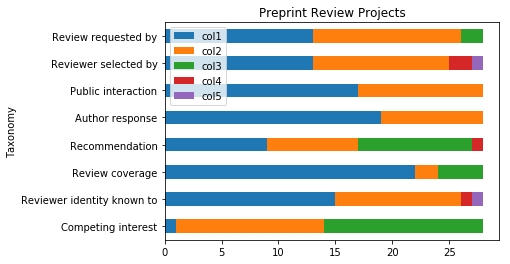

In [66]:
figure1 = reversed_df.plot(x='Taxonomy', kind='barh', stacked=True,
        title='Preprint Review Projects')
figure1.figure
#figure1.get_legend().remove()

#plt.savefig("stackedRR.png")

In [137]:
font_color = '#525252'
csfont = {'fontname':'Georgia'} # title font
hfont = {'fontname':'Calibri'} # main font
colors = ['#5DCBBB', '#9ADFCC', '#FFFACC','#FBE488','#F6CF69']

figure1 = reversed_df.plot(x='Taxonomy', kind='barh', stacked=True, figsize=(10, 6), color=colors)
title = plt.title('Preprint Review Projects', fontsize=18, color=font_color, **csfont)
title.set_position([.5, 1.02])

df_total = 28
df_rel = df[df.columns[1:]].div(df_total, 0)*100
 
for n in df_rel:
    for i, (cs, ab, pc) in enumerate(zip(df.iloc[:, 1:].cumsum(1)[n], 
                                         df[n], df_rel[n])):
        figure1.text(cs - ab / 2, i, str(np.round(pc, 1)) + '%', 
                 va = 'center', ha = 'center',rotation = 0, fontsize = 10, color='black')
        
for label in (figure1.get_xticklabels() + figure1.get_yticklabels()):
    label.set_fontsize(15)
plt.xticks(color=font_color, **hfont)
plt.yticks(color=font_color, **hfont)

figure1.figure
plt.savefig("stackedRR_color.svg")

/Users/victoriayan/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


In [42]:
# Part 2 split by review requested by 
AuthorTab = AP_tab[AP_tab['Review requested by'].str.contains('Authors') ]
AuthorTab = AuthorTab[~AuthorTab['Review requested by'].str.contains('Non')] 
NonAuthorTab = AP_tab[AP_tab['Review requested by'].str.contains('Non') ]
NonAuthorTab = NonAuthorTab[~NonAuthorTab['Review requested by'].str.contains('Authors')] 

In [87]:
# Now check for a split between author driven vs. non-author driven peer review
ArsS = AuthorTab['Reviewer selected by'].str.contains('Self').sum() 
ArsESC = AuthorTab['Reviewer selected by'].str.contains('Editor').sum() 
ArsA = AuthorTab['Reviewer selected by'].str.contains('Author').sum() 
ArsAE = 1 #Peerage of science
ArsES = 2
NArsS = NonAuthorTab['Reviewer selected by'].str.contains('Self').sum() 
NArsESC = NonAuthorTab['Reviewer selected by'].str.contains('Editor').sum() 
NArsA = NonAuthorTab['Reviewer selected by'].str.contains('Author').sum() 
NArsAE = 0 
NArsES = 0
ANArsS = 1 # PREreview 
ANArsESC = 1 #Scipost
ANArsA = 0
ANArsAE = 0 
ANArsES = 0 

In [91]:
countr = np.array([[ArsS,ArsESC,ArsA,ArsES,ArsAE],[NArsS,NArsESC,NArsA,NArsES,NArsAE],[ANArsS,ANArsESC,ANArsA,ANArsES,ANArsAE]])
countrInt = countr.astype(int)

dfr = pd.DataFrame(data=countrInt, index = ['1','2','3'], \
                  columns=["Self-nominated", "Editor, Community or Service","Authors","Editor, Community or Service|Self-nominated", "Editor, Community or Service|Authors"])
rsb = ["Authors","Non-authors","Author|Non-authors"]

dfr.insert(0,"Reviewer selected by", rsb)
reversed_dfr = dfr.iloc[::-1]

In [89]:
dfr

,Reviewer selected by,Self-nominated,"Editor, Community or Service",Authors,"Editor, Community or Service|Self-nominated","Editor, Community or Service|Authors"
1,Authors,3,12,1,2,1
2,Non-authors,10,3,0,0,0
3,Author|Non-authors,1,1,0,0,0


In [138]:
figure3 = reversed_dfr.plot(x='Reviewer selected by', kind='barh', stacked=True,
        title='Review requested by')
figure3.figure
plt.savefig("review_req.svg")

/Users/victoriayan/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


In [94]:
# Public interaction
aPii = AuthorTab['Public interaction'].str.contains('Included').sum() 
aPin = AuthorTab['Public interaction'].str.contains('Not').sum() 
NaPii = NonAuthorTab['Public interaction'].str.contains('Included').sum() 
NaPin = NonAuthorTab['Public interaction'].str.contains('Not').sum()
ANAPii = 0
ANAPin = 2

In [101]:
countp = np.array([[aPii,aPin],[NaPii,NaPin],[ANAPii,ANAPin]])
countpInt = countp.astype(int)

dfp = pd.DataFrame(data=countp, index = ['1','2','3'], \
                  columns=["Included", "Not-included"])
rsb = ["Authors","Non-Authors","Author|Non-authors"]

dfp.insert(0,"Public interaction", rsb)
reversed_dfp = dfp.iloc[::-1]

In [102]:
dfp

,Public interaction,Included,Not-included
1,Authors,3,10
2,Non-Authors,12,1
3,Author|Non-authors,0,2


In [139]:
figure4 = reversed_dfp.plot(x='Public interaction', kind='barh', stacked=True,
        title='Public Interactions')
figure4.figure
plt.savefig("public_interactions.svg")

/Users/victoriayan/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


In [100]:
# Author response
arii = AuthorTab['Opportunity for author response'].str.contains('Included').sum() 
arin = AuthorTab['Opportunity for author response'].str.contains('Not').sum() 
Narii = NonAuthorTab['Opportunity for author response'].str.contains('Included').sum() 
Narin = NonAuthorTab['Opportunity for author response'].str.contains('Not').sum()
ANArii = 1
ANArin = 1

In [104]:
# Opportunity for author response
counta = np.array([[arii,arin],[Narii,Narin],[ANArii,ANArin]])
countaInt = counta.astype(int)

dfa = pd.DataFrame(data=countaInt, index = ['1','2','3'], \
                  columns=["Included", "Not-included"])
rsb = ["Authors","Non-Authors","Author|Non-authors"]

dfa.insert(0,"Opportunity for author response", rsb)
reversed_dfa = dfa.iloc[::-1]

In [140]:
figure5 = reversed_dfa.plot(x='Opportunity for author response', kind='barh', stacked=True,
        title='Opportunity for author response')
figure5.figure
plt.savefig("author_response.svg")

/Users/victoriayan/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


In [108]:
# Review coverage
AcC = AuthorTab['Review coverage'].str.contains('Complete').sum() 
AcS = AuthorTab['Review coverage'].str.contains('Specific').sum() 
AcCS = 1
NAcC = NonAuthorTab['Review coverage'].str.contains('Complete').sum() 
NAcS= NonAuthorTab['Review coverage'].str.contains('Specific').sum() 
NAcCS = 2
ANAcC = 1 # PREreview 
ANAcS = 0 
ANAcCS = 1

countc = np.array([[AcC,AcS,AcCS],[NAcC,NAcS,NAcCS],[ANAcC,ANAcS,ANAcCS]])
countcInt = countc.astype(int)

dfc = pd.DataFrame(data=countcInt, index = ['1','2','3'], \
                  columns=["Complete paper", "Specific aspects","Complete paper|Specific aspects"])
rsb = ["Authors","Non-authors","Author|Non-authors"]

dfc.insert(0,"Review coverage", rsb)
reversed_dfc = dfc.iloc[::-1]

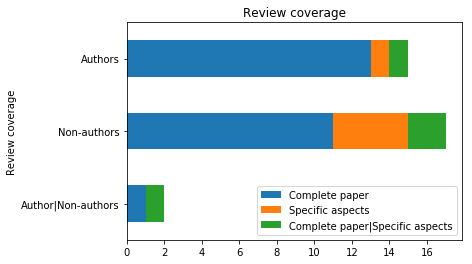

In [109]:
figure6 = reversed_dfc.plot(x='Review coverage', kind='barh', stacked=True,
        title='Review coverage')
figure6.figure

In [117]:
# Reviewer identity known
AriE = AuthorTab['Reviewer identity known'].str.contains('Editor or service').sum() 
AriP = AuthorTab['Reviewer identity known'].str.contains('Public').sum() 
AriN= 0
AriEP = 0
AriNP = 0
NAriE = NonAuthorTab['Reviewer identity known'].str.contains('Editor or service').sum() 
NAriP= NonAuthorTab['Reviewer identity known'].str.contains('Public').sum() 
NAriN = 0
NAriEP = 1 # Sinai
NAriNP =1 # Pubpeer 
ANAriE = 1 # PREreview 
ANAriP = 1 # Scipost 
ANAriN = 0
ANAriEP = 0
ANAriNP = 0

counti = np.array([[AriE,AriP,AriN,AriEP,AriNP],[NAriE,NAriP,NAriN,NAriEP,NAriNP],[ANAriE,ANAriP,ANAriN,ANAriEP,ANAriNP]])
countiInt = counti.astype(int)

dfi = pd.DataFrame(data=countiInt, index = ['1','2','3'], \
                  columns=["Editor or service", "Public","Noone","Editor or service|Public","Public|Noone"])
rsb = ["Authors","Non-authors","Author|Non-authors"]

dfi.insert(0,"Reviewer identity known to", rsb)
reversed_dfi = dfi.iloc[::-1]

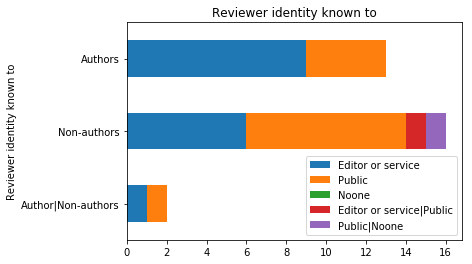

In [115]:
figure7 = reversed_dfi.plot(x='Reviewer identity known to', kind='barh', stacked=True,
        title='Reviewer identity known to')
figure7.figure

In [125]:
# Competing interests
Acid= AuthorTab['Competing interests'].str.contains('Displayed').sum() 
Acic = AuthorTab['Competing interests'].str.contains('Checked').sum() 
Acin = AuthorTab['Competing interests'].str.contains('Not').sum() 
NAcid = NonAuthorTab['Competing interests'].str.contains('Displayed').sum() 
NAcic = AuthorTab['Competing interests'].str.contains('Checked').sum() 
NAcin= NonAuthorTab['Competing interests'].str.contains('Not').sum() 
ANAcid = 0 # PREreview 
ANAcic = 0
ANAcin = 2 # Scipost 


countci = np.array([[Acid,Acic,Acin],[NAcid,NAcic,NAcin],[ANAcid,ANAcic,ANAcin]])
countciInt = countci.astype(int)

dfci = pd.DataFrame(data=countciInt, index = ['1','2','3'], \
                  columns=["Displayed", "Checked","Not included"])
rsb = ["Authors","Non-authors","Author|Non-authors"]

dfci.insert(0,"Competing interests", rsb)
reversed_dci = dfci.iloc[::-1]

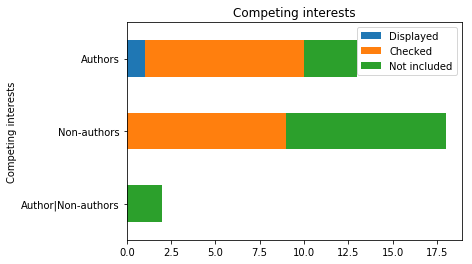

In [126]:
figure8 = reversed_dci.plot(x='Competing interests', kind='barh', stacked=True,
        title='Competing interests')
figure8.figure

In [134]:
# Recommendation
Arb= AuthorTab['Recommendation'].str.contains('Binary decision').sum() 
Aro = AuthorTab['Recommendation'].str.contains('Other scale or rating').sum() 
Arn = AuthorTab['Recommendation'].str.contains('None').sum() 
Arbo = 1 #Science open
NArb = NonAuthorTab['Recommendation'].str.contains('Binary decision').sum()
NAro = NonAuthorTab['Recommendation'].str.contains('Other scale or rating').sum()
NArn = NonAuthorTab['Recommendation'].str.contains('None').sum()
NArbo= 0
ANArb = 1 #Scipost
ANAro = 1 #Prereview
ANArn = 0
ANArbo= 0

countre = np.array([[Arb,Aro,Arn,Arbo],[NArb,NAro,NArn,NArbo],[ANArb,ANAro,ANArn,ANArbo]])
countreInt = countre.astype(int)

dfre = pd.DataFrame(data=countreInt, index = ['1','2','3'], \
                  columns=["Binary decision", "Other scale or rating","None","Binary decision|Other scale or rating"])
rsb = ["Authors","Non-authors","Author|Non-authors"]

dfre.insert(0,"Recommendation", rsb)
reversed_dre = dfre.iloc[::-1]

/Users/victoriayan/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


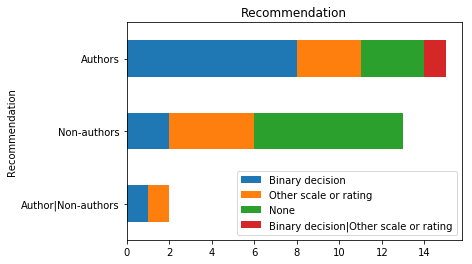

In [136]:
figure9 = reversed_dre.plot(x='Recommendation', kind='barh', stacked=True,\
        title='Recommendation')
figure9.figure